# Introduction

Harmonic oscillators are the pulsing hearts of seismic sensors; they beat with the ground as it moves up and down. While the first mechanical seismic sensors at the turn of the last century were simple harmonic oscillators in the form of a mass-spring system or pendulum, this simple form of oscillators soon evolved into a magnetic mass and coil of wire to use the electromagnetic induction effect, and create a voltage corresponding to the beating of the ground. 

Today, majority of the ultra-sensitive electronic feedback broadband sensors incorporate a capacitive displacement transducer and a force transducer to increase sensitivity and resolution of the motion detection threshold. Despite the electronic additions and components, the heart of these modern equipment still beat with an oscillating mass and equivalent electronic damper. 

That is why it is essential to review physics of simple harmonic oscillators, and damped harmonic oscillators, in its raw form and take to the heart the relationship between mass, spring stiffness, length of the spring and how they affect frequency of oscillation.

In the exercises below, we review these basic cases. 




# simple mass-spring system:




<div class="caption">An example of a mass-on-a-spring from <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/shm2.html">HyperPhysics</a></div></div>


<div class="figure"><img src="http://hyperphysics.phy-astr.gsu.edu/hbase/imgmec/shm8.gif" style="width:190px">



Everything begins with the Newton's Second Law:


$$F = ma, $$

For the mass to be in equilibrium position, forces on the mass from gravity and from the spring should be equal. Assuming displacement is a cosine function, we can write equations and solve for angular frequency $\omega$ as follow: 
    
$$F = ma, $$

$$Fx = -Kx, $$  
    
$$ ma = -Kx, $$ 
    
$$m \frac{d^2 x}{dt^2} = -Kx,$$

$$ \frac{d^2 x}{dt^2} = -\frac{K}{m}x,$$
 
    
$$ x(t) = A cos(\omega t +\phi) $$    

$$ -A\omega^2 cos (\omega t +\phi) = -\frac{K}{m}  A cos(\omega t +\phi) $$   
    
$$ \omega = \sqrt{\frac {k}{m}}$$    
    
 
Natural frequency of oscillation in the simple mass-spring only depends on the stiffness of the spring and the mass.
 
In the absence of damping, this oscillator oscillates with equal displacement on either sides of the equilibrium position and forever!     
        

## Main

## import statements

In [8]:
import numpy as np           
from obspy import read
import math

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings              # depress useless FutureWarning
# suppress all of obspy's stupid future deprecation warnings
warnings.simplefilter('ignore', FutureWarning)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

## 1- Mass-Spring -- Frequency.SpringStiffness.Mass relationship

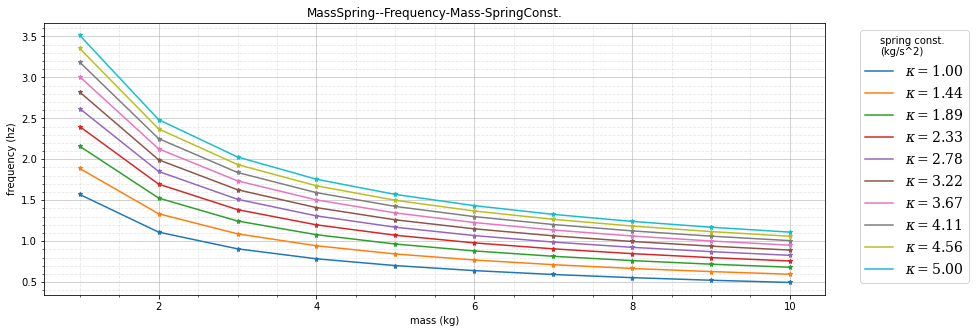

In [69]:
# simple harmonic oscillator
# 1- Build a mass-spring system 
#
# equation:
# MASS-SPRING ::: 2*pi*F = sqrt (K/M)
# plot F,k,M (Frequency, Spring constant, Mass)
#
# Units: 
# K (spring constant) = Newton/meter or (kg/s^2) 
# M (Mass) = kg
# F (Frequency) = 1/s
#
# Objectives:
# observe relationships of these parameters, how do they change with respect to eachother?
# 
#
#
N = 10
# assign Mass (kg) 
pm = np.linspace(1,10,N)
# assign spring constant (kg/s^2) 
kss = np.linspace(1,5,N)


fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(111, label="1")

colors = np.array([
    [232,  85,  18],
    [244, 169,   0],
    [243, 235,   6],
    [181, 211,  50],
    [138, 202, 148],
    [124, 205, 222],
    [ 85, 163, 220],
    [ 68,  98, 175],
    [ 61,  83, 166],
    [ 35,  31,  32]])/255
colors = colors[::-1]  # flip the array around



for k in kss:

    px = k/pm
    pf = (np.sqrt(px))/2*np.pi
    ax1.plot(pm, pf, marker = '*', markersize=5 ) 


## plot labels
ax1.set_xlabel('mass (kg)', color="k") 
ax1.set_ylabel('frequency (hz)', color="k")
ax1.set_title('MassSpring--Frequency-Mass-SpringConst.')

plt.gca().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.grid(which='major', alpha=.7)
plt.grid(which='minor', linestyle='--', alpha=.3)

for h, c in zip(kss, colors):
    ax1.plot(np.nan, np.nan, '-', label=r"$ \kappa = {:.2f}$".format(h))
#    ax1.plot(pm, pf, '-', label=r"$ \kappa = {:.2f}$".format(h))
    plt.legend(bbox_to_anchor=(1.035,1), loc="upper left", fontsize=14
               , title='spring const. \n(kg/s^2)')

#print (kss)
plt.show()

## Damped Mass-Spring


Simple Harmonic Motion is a rarity in the real world! There is always some kind of a frictional force that acts on the motion which dampen and eventually kills it. Like a Swing that stops swinging in the absence of an external force(push).
 
Seismologist incorporate, adjust and calculate for the effect of damping on the oscillator within the seismic sensor and use it to their benefit. As the ground shake continuously by the arrival of seismic waves, the oscillator in the sensor also moves. But this oscillation needs to be under control, and the oscillator should come to a resting equilibrium quickly after each shaking.  

Let’s take a look and review the mass-spring system with the effect of damping.
We can write the Newton’s second law:

$$ ma = -bv-Kx $$

$$m \frac{d^2 x}{dt^2} +b\frac{dx}{dt} +Kx = 0,$$

And solving:

$$ \omega = \sqrt{\frac {k}{m} - (\frac {b}{2m}^2}) $$ 

$\omega_0$ is the antural frequency of the system in the absense of damping 

$$ \omega_0 = \sqrt {\frac{K}{m}},$$



$$ \omega = \sqrt{\omega_0^2 - (\frac {b}{2m}^2}) $$

## 2- Damped Mass-Spring -- FKMb relationship


[ 0.63661977  0.31830989  0.21220659  0.15915494  0.12732395  0.1061033
  0.09094568  0.07957747  0.07073553  0.06366198]
[ 0.63658907  0.31806418  0.21137603  0.15717779  0.12342666  0.09925054
  0.0797227   0.06189359  0.0428629   0.01199379]
[ 0.63649696  0.31732593  0.20886455  0.15109116  0.11091615  0.07502636
  0.02468774         nan         nan         nan]
[ 0.6363434   0.31609167  0.20461024  0.14036147  0.08611706         nan
         nan         nan         nan         nan]
[ 0.63612836  0.31435557  0.19850109  0.12378718  0.02398759         nan
         nan         nan         nan         nan]
[ 0.63585178  0.31210926  0.1903586   0.09845969         nan         nan
         nan         nan         nan         nan]
[ 0.63551357  0.30934161  0.17990689  0.05305165         nan         nan
         nan         nan         nan         nan]
[ 0.63511363  0.30603848  0.16671222         nan         nan         nan
         nan         nan         nan         nan]
[ 0.63465185  0.3

/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/miniconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/akram/

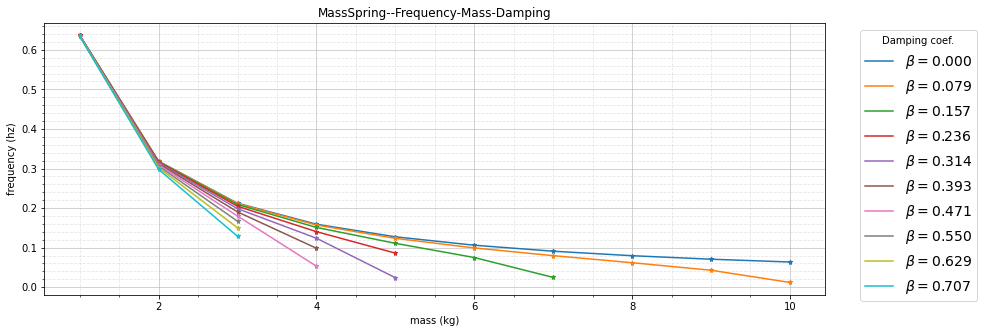

In [53]:
# 2- Build a damped mass-spring
# equations:
# DAPMED MASS-SPRING ::: 2*pi*F = sqrt ((K/M)**2 - (b/2*M)**2)
# plot F,K,M,b - 3D surface plot
# observe relationships of these parameters, and how they change with respect to eachother

N = 10
#MASS
pm = np.linspace(1,10,N)
# spring constant(kg/s^2)
k = 4

# make a N damping coefficients from 0 to sqrt(2)/2 (critical damping) 0.707
bss = np.linspace(0, np.sqrt(2)/2, N)
#damping_coefs = np.linspace(0, np.sqrt(2)/2, N)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(111, label="1")

for b in bss:
    pw0 = (k/pm)**2
    pf = (np.sqrt((pw0)-((b/2*pm)**2)))/(2*np.pi) 
    ax1.plot(pm, pf, marker = '*', markersize=5 )
    print (pf)
    
ax1.set_xlabel('mass (kg)', color="k") 
ax1.set_ylabel('frequency (hz)', color="k")
#ax1.legend(('1', '2', '3', '4', '5'),
#           loc='upper right')
ax1.set_title('MassSpring--Frequency-Mass-Damping')  
plt.gca().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.grid(which='major', alpha=.7)
plt.grid(which='minor', linestyle='--', alpha=.3)

for h, c in zip(bss, colors):
    ax1.plot(np.nan, np.nan, '-', label=r"$ \beta = {:.3f}$".format(h))
    plt.legend(bbox_to_anchor=(1.035,1), loc="upper left", fontsize=14
               , title='Damping coef.')

print(bss)
plt.show()
#ax.set_ylabel(r"$sin\ \alpha$")



## Simple Pendulum

Similar to the simple mass-spring system, mass hanging on the string form a simple oscillating pendulum where two forces act on the mass: gravity and tension form the string. Equating these forces and solving the Second Law for frequency gives us: 

$$ \omega = \sqrt {\frac{g}{L}},$$

Period of oscillation (/angular frequency) depends on its length (L) and gravity (g) and is independent of the mass.






## 3- Pendulum 


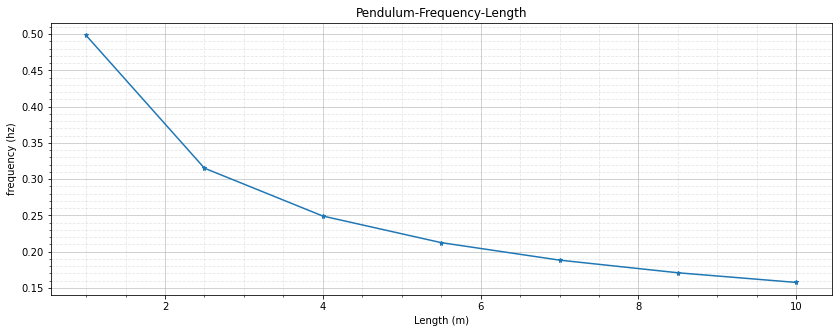

In [52]:
# equations:
# Pendulum ::: 2*pi*F = sqrt (g/L)
# Garden-gate pendulum ::: 2*pi*F = sqrt (g*sin(a)/L) ==> for horizontal channels

# length of the pendulum
Lss = np.linspace(1,10,7)

g = 9.8
px = g/Lss
pf = (np.sqrt(px))/(2*np.pi)


## plot
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(111, label="1")

ax1.plot(Lss, pf, marker = '*', markersize=5 )

ax1.set_xlabel('Length (m)', color="k") 
ax1.set_ylabel('frequency (hz)', color="k")

ax1.set_title('Pendulum-Frequency-Length')
plt.gca().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.grid(which='major', alpha=.7)
plt.grid(which='minor', linestyle='--', alpha=.3)
#print(Lss,px,pf)
plt.show()



# Garden gate pendulum and LaCoste suspension
## Basis of Long Period seismic sensors

<br>

We saw above that in the simple pendulum, period of oscillation depends on g and L. Increasing the length of the pendulum decreases the period of oscillation. Acceleration due to gravity is a fixed value and we can’t change it unless we go to the Moon! However, clever people came up with some tricks to decrease the force of gravity by tilting and/or suspending the frame/mass in which the pendulum is attached to.

<br>

 <div class="caption">Garden-gate pendulum <a href="http://ed-thelen.org/Seismo/Building_a_simple_seismometer.pdf">Building a simple_seismometer</a></div></div> 


<img src="garden-gate-pendulum.png" width="300"/>

<br>

Let's take a look:


<br>



<br>

## 4- Garden-gate pendulum

<br>


In [72]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
# equations:
# Garden-gate pendulum ::: 2*pi*F = sqrt (g*sin(a)/L) ==> for horizontal channels 

# length of the pendulum in meter
Length = np.linspace(1,10,20)

# tilt angle 
alpha = np.linspace(0.05,0.3,20)

# sine of the tilt angle 
sinalpha = np.sin(alpha) 

# Gravitational acceleration  
g = 9.8

def f_func(sinalpha,Length):
 return ((1/(2*np.pi))*(np.sqrt(g*sinalpha/Length)))

A,L = meshgrid(sinalpha, Length) # grid of point
F = f_func(A, L) # evaluation of the function on the grid

## uncomment lines below to plot the 2D contour plot
#fig = plt.figure(figsize=(14,5))
#ax1 = fig.add_subplot(111, label="1")

#im = ax1.imshow(F,cmap=cm.RdBu , aspect='auto') # drawing the function
## adding the Contour lines with labels
#ax1.cset = contour(F,arange(0.04,0.3,0.02),linewidths=2,cmap=cm.Set2)
#cset = contour(F,arange(0.04,0.3,0.02),linewidths=2,cmap=cm.Set2)

#clabel(ax1.cset,inline=True,fmt='%1.2f',fontsize=10)
#cbar=plt.colorbar(im) # adding the colobar on the right
#cbar.set_label('Frequency')

##latex title
#title('$f=(1/2\pi)\ \sqrt{g\ sin{\,\\alpha /\ L}}$')
#ax1.set_xlabel(r"")
#ax1.set_ylabel(r"")
#show()


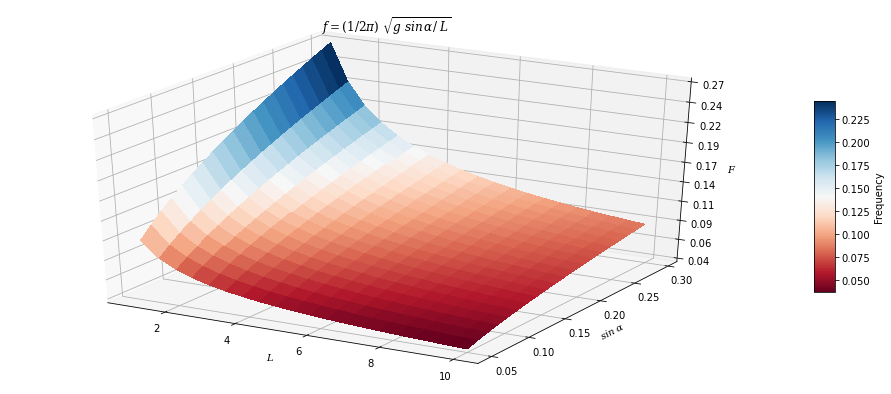

In [71]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt


# make and plot figure

fig = plt.figure(figsize=(17,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(L, A, F, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

#cset = ax.contour(L, A, F, colors='k')  # Plot contour curves
#ax.clabel(cset, fontsize=9, inline=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

cbar=plt.colorbar(surf, shrink=0.5, aspect=9)
cbar.set_label('Frequency')

title('$f=(1/2\pi)\ \sqrt{g\ sin{\,\\alpha /\ L}}$')
ax.set_xlabel(r"$L$")
ax.set_ylabel(r"$sin\ \alpha$")
ax.set_zlabel(r"$F$")

plt.show()

## Electromagnetic velocity transducer
<br>

A velocity transducer is used in many seismometers to measure the motion of the mass. It is a moving coil within a magnetic field, being either 1) a fixed coil and a magnet that moves with the mass or 2) fixed magnet but a moving coil with the mass. In this system, output from the coil is proportional to the velocity of the mass relative to the frame. 

Generator Coil (aka signal coil or simply coil) is built with hundreds of thousands of turns of thin wire winding. Signal coil makes it possible to damp the seismometer in a very simple way: as the Earth moves, the mass moves in the magnet's magnetic field produced by the magnet, and a voltage is produced in the coil of wire that can be measured and recorded. Now the induced current in the coil produces a secondary magnetic field that damps the motion of the mass. This secondary magnetic field basically opposes the motion of the mass, resist and damp the motion. 

Generator constant G: Relates the velocity of the mass to the output of the coil. It has unit of V/ms-1 and is typical in the range of 30-500 V/ms-1 .
Generator Coil Resistance Rg: is the resistance of the generator coil (aka signal coil) in Ohms.

This is another case of a damped harmonic oscillator and equation of motion and velocity can be derived similar to previous examples.  Only that output signal is a voltage proportional to mass-frame velocity and the Generator constant G. 
After some algebra and solving for initial conditions, we get:

<br>

$$\normalsize V(t) = G\dot x(t) = -G e^{-\lambda\omega_0 t}\sin{\omega_d t}
\qquad \omega_d = \omega_0\sqrt{1-\lambda^2}$$


$\lambda$ is a damping coefficient

<br>

## 5- Effect of damping on signal - ELECTROMAGNETIC velocity transducer

<br>

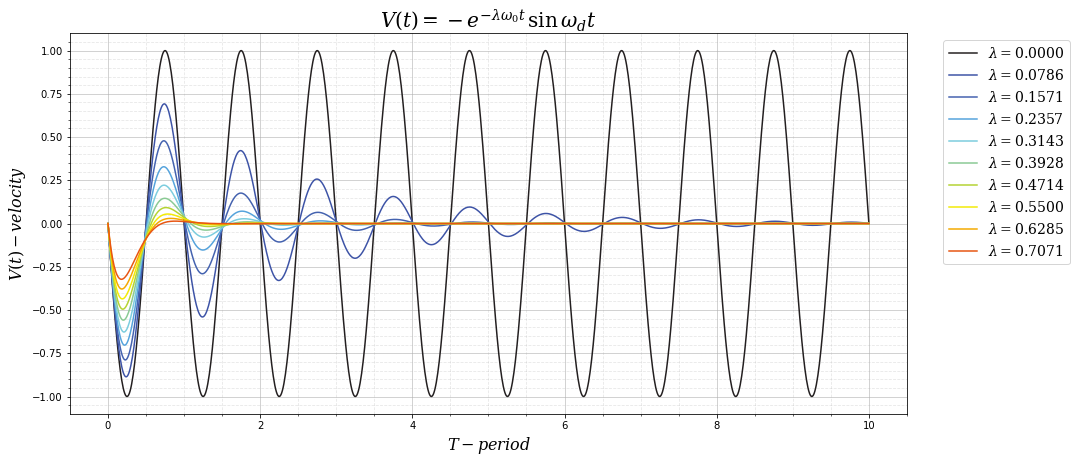

In [76]:
### inspired by Figure 2.10 Havskov and Young-Abbot 2020, SRL 
#
#
#
# import statements
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# number of lines we're going to plot
N = 10

# make a N damping coefficients from 0 to sqrt(2)/2 (critical damping)
damping_coefs = np.linspace(0, np.sqrt(2)/2, N)
# get a list of colors from a colormap
#colors = plt.cm.get_cmap('gist_rainbow_r')(np.linspace(0, 1, N))
colors = np.array([
    [232,  85,  18],
    [244, 169,   0],
    [243, 235,   6],
    [181, 211,  50],
    [138, 202, 148],
    [124, 205, 222],
    [ 85, 163, 220],
    [ 68,  98, 175],
    [ 61,  83, 166],
    [ 35,  31,  32]])/255
colors = colors[::-1]  # flip the array around

# make a figure
plt.figure(figsize=[15,7])

# plot damping coefs
for h, c in zip(damping_coefs, colors):  # for each pair of coefs and colors

# set up a seismometer with a natural period of 1 s
    T0 = 1           # natural period (s)
    f0 = 1/T0        # natural frequency (Hz)
    w0 = 2*np.pi*f0  # natural angular frequency
    
    # compute damped parameters
    wd = w0*np.sqrt(1-h**2)  # damped angular frequency
    fd = wd / (2*np.pi)      # damped frequency
    Td = 1/fd                # damped period
    
    #  
    t = np.linspace(0, 10, 1000)        # time axis (1 period length)
    V = lambda t: -np.exp(-h*w0*t)*np.sin(wd*t)  # weight lift
    
    # plot velocity with various damping coefs
    plt.plot(t,      V(t),      '-', color=c, fillstyle='none', markersize=8, clip_on=False)  # full waveform

    # label the figure
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'  # serif font for latex
plt.title(r"$V(t) = -e^{-\lambda\omega_0 t}\,\sin{\,\omega_d t}$", fontsize=20)
plt.ylabel(r"$V(t) - velocity$", fontsize=16)
plt.xlabel(r"$T - period$", fontsize=16)
#plt.xticks([0, 1/4, 1/2, 3/4, 1],
#           [r"$0$", r"$^1/_4 T_0$", r"$^1/_2 T_0$", r"$^3/_4 T_0$", r"$T_0$"], fontsize=14)

# make a nice and orderly legend by plotting nans
for h, c in zip(damping_coefs, colors):
    plt.plot(np.nan, np.nan, '-', color=c, label=r"$\lambda = {:.4f}$".format(h))

plt.legend(bbox_to_anchor=(1.035,1), loc="upper left", fontsize=14)

# add minor ticks and gridlines
plt.gca().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.grid(which='major', alpha=.7)
plt.grid(which='minor', linestyle='--', alpha=.3)

# show the figure
plt.show()